# EFFETTO DOPPLER IN DUE DIMENSIONI

In [3]:
#import pygame
import math
import numpy as np
import matplotlib.pyplot as plt
from libs.mySound import *
from libs.Particle import *
from libs.DopplerEffect import *
import os

pygame 2.1.1 (SDL 2.0.18, Python 3.9.9)
Hello from the pygame community. https://www.pygame.org/contribute.html


---

## Descrizione fisica

<img src='doppler0.jpg' width="400">

A e B sono due punti che si muovono in un piano.

A si muove di moto rettilineo uniforme ${\bf{x}}_\mathrm{A}(t) = {\bf{v}}_\mathrm{A}t + {\bf{x}}_{\mathrm{A}0}$,
mentre B si muove di moto uniformemente accelerato ${\bf{x}}_\mathrm{B}(t)
= \frac12{\bf{a}}_\mathrm{B}t^2 +  {\bf{v}}_\mathrm{0B}t + {\bf{x}}_{0\mathrm{B}}$

 Il punto A emette in continuazione un suono di frequenza $f$.

<img src='doppler.jpg' width="600">

All’istante $t$ in ${\bf{x}}_B(t)$ giunge il suono emesso all'istante $t − ∆t$ in ${\bf{x}}_A(t − ∆t)$.
La condizione da soddisfare è che $|{\bf{d}}| = |{\bf{x}}_B(t) − {\bf{x}}_A(t − ∆t)| = c∆t$.

O anche, come evidenziato in figura, ${\bf{d}} = ∆{\bf{x}}_A + {\bf{d}}_0$

Una volta noto il vettore $\bf{d}$, vi si proiettano le velocità in modo da ottenere le velocità degli oggetti nella direzione percorsa dal suono: $v_d = \frac{v_xd_x + v_yd_y}{\sqrt{d_x^2 + d_y^2}}$

Infine, note le velocità proiettate $ v_{\mathrm{A}d}$ e $v_{\mathrm{B}d}$ si inseriscono nella formula per la ottenere la nuova frequenza $f'= \frac{c-v_{Bd}}{c-v_{Ad}}f$

---

## Dati della simulazione

<div class="alert alert-block alert-warning">
<b>Importante:</b> Per modificare i dati della simulazione basta modificare i relativi valori numerici nelle celle sottostanti. Dopodiché è necessario cliccare "Run -> Run All Cells" nel menù in alto a sinistra.
</div>

### Frequenza e velocità del suono

In [4]:
f0 = 440 # Hz
c = 340 # m/s

### Posizione iniziale e velocità della sorgente A

La posizione iniziale è espressa in coordinate cartesiane $(x_\mathrm{A0}, y_\mathrm{A0})$ in metri.

In [5]:
x_A0 = 0 # m
y_A0 = 0 # m

La velocità è espressa in coordinate polari $(v_\mathrm{A}, \alpha_{v\mathrm{A}})$ = (modulo, angolo) in m/s e gradi sessagesimali

In [6]:
v_A = 30 # m/s
v_angle_A = 50 # gradi

### Posizione iniziale, velocità iniziale e accelerazione dell'osservatore B

La posizione iniziale è espressa in coordinate cartesiane $(x_\mathrm{B0}, y_\mathrm{b0})$ in metri.

In [7]:
x_B0 = 50 # m
y_B0 = 0 # m

La velocità iniziale è espressa in coordinate polari $(v_\mathrm{0B}, \alpha_{v\mathrm{B}})$ = (modulo, angolo) in m/s e gradi sessagesimaliessa in coordinate polari (modulo, angolo) in (m/s, gradi sessagesimali)

In [8]:
v_B = 15 # m/s
v_angle_B = 120 # gradi

L'accelerazione è espressa in coordinate polari $(a_\mathrm{B}, \alpha_{a\mathrm{B}})$ = (modulo, angolo) in m/s^2 e gradi sessagesimali

In [9]:
a_B = 5 #m/s^2
a_angle_B = 30 #gradi

### Inizio e fine del moto (in secondi)

In [10]:
start_time = 0  # ALWAYS                                                                                                                                    
end_time = 10 # s
N = 3000

---

## Simulazione

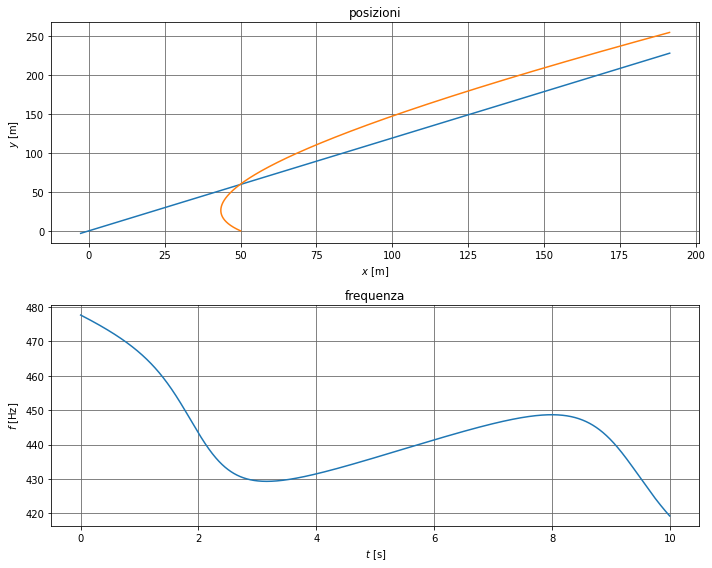

In [11]:
S = mySound(f0, c)
mru_A = True # PER FORZA VERO
A = Particle(x_A0, y_A0, v_A, v_angle_A)
mru_B = False
B = Particle(x_B0, y_B0, v_B, v_angle_B, a_B, a_angle_B, mru_B)
timing = tuple((start_time, end_time, N))

de = DopplerEffect(A, B, S, timing)
de.dopplerEffectSimulate()    
de.dopplerEffectResults()